1. Create way to connect to database
2. Query a Database


In [1]:
import pandas as pd
from sqlalchemy import create_engine

# Introduction

In [2]:
# Create database engine  to manage connection
engine = create_engine('sqlite:///data.db')  # Make sure to remember 3 ///
# Read the weather table
weather = pd.read_sql("weather", engine)

weather.head()

,station,name,latitude,longitude,elevation,date,month,awnd,prcp,snow,tavg,tmax,tmin
0,USW00094728,"NY CITY CENTRAL PARK, NY US",40.77898,-73.96925,42.7,12/01/2017,December,5.37,0.00,0.0,,52,42
1,USW00094728,"NY CITY CENTRAL PARK, NY US",40.77898,-73.96925,42.7,12/02/2017,December,3.13,0.00,0.0,,48,39
2,USW00094728,"NY CITY CENTRAL PARK, NY US",40.77898,-73.96925,42.7,12/03/2017,December,2.01,0.00,0.0,,48,42
3,USW00094728,"NY CITY CENTRAL PARK, NY US",40.77898,-73.96925,42.7,12/04/2017,December,3.58,0.00,0.0,,51,40
4,USW00094728,"NY CITY CENTRAL PARK, NY US",40.77898,-73.96925,42.7,12/05/2017,December,6.71,0.75,0.0,,61,50


In [3]:
# Create database engine  to manage connection
engine = create_engine('sqlite:///data.db') # Make sure to remember 3 ///
# Read the weather table
weather = pd.read_sql("SELECT * FROM weather", engine)

weather.head()


,station,name,latitude,longitude,elevation,date,month,awnd,prcp,snow,tavg,tmax,tmin
0,USW00094728,"NY CITY CENTRAL PARK, NY US",40.77898,-73.96925,42.7,12/01/2017,December,5.37,0.00,0.0,,52,42
1,USW00094728,"NY CITY CENTRAL PARK, NY US",40.77898,-73.96925,42.7,12/02/2017,December,3.13,0.00,0.0,,48,39
2,USW00094728,"NY CITY CENTRAL PARK, NY US",40.77898,-73.96925,42.7,12/03/2017,December,2.01,0.00,0.0,,48,42
3,USW00094728,"NY CITY CENTRAL PARK, NY US",40.77898,-73.96925,42.7,12/04/2017,December,3.58,0.00,0.0,,51,40
4,USW00094728,"NY CITY CENTRAL PARK, NY US",40.77898,-73.96925,42.7,12/05/2017,December,6.71,0.75,0.0,,61,50


In [4]:
# How to find table name
engine.table_names()

C:\Users\muham\AppData\Local\Temp\ipykernel_7800\98411545.py:2: SADeprecationWarning: The Engine.table_names() method is deprecated and will be removed in a future release.  Please refer to Inspector.get_table_names(). (deprecated since: 1.4)
  engine.table_names()


['boro_census', 'hpd311calls', 'weather']

In [5]:
weather = pd.read_sql("SELECT * FROM weather", engine)
boro_census = pd.read_sql("SELECT * FROM boro_census", engine)
hpd311calls = pd.read_sql("SELECT * FROM hpd311calls", engine)


print('Number of row and columns, weather : ' + str(weather.shape))
print('Number of row and columns, boro_census : ' + str(boro_census.shape))
print('Number of row and columns, hpd311calls : ' + str(hpd311calls.shape))

Number of row and columns, weather : (121, 13)
Number of row and columns, boro_census : (5, 34)
Number of row and columns, hpd311calls : (94889, 8)


# Refining import with SQL Queries

In [6]:
query = """SELECT *              
FROM hpd311calls             
WHERE borough = 'BROOKLYN';"""

brooklyn = pd.read_sql(query, engine)

print(brooklyn.head())

  unique_key created_date agency  complaint_type incident_zip  \
0   38072466   01/01/2018    HPD  HEAT/HOT WATER        11213   
1   38076014   01/01/2018    HPD  HEAT/HOT WATER        11249   
2   38081044   01/01/2018    HPD  HEAT/HOT WATER        11226   
3   38074248   01/01/2018    HPD  HEAT/HOT WATER        11219   
4   38073079   01/01/2018    HPD  HEAT/HOT WATER        11213   

       incident_address community_board   borough  
0       1030 PARK PLACE     08 BROOKLYN  BROOKLYN  
1        70 ROSS STREET     01 BROOKLYN  BROOKLYN  
2  287 LINDEN BOULEVARD     17 BROOKLYN  BROOKLYN  
3        1329 50 STREET     12 BROOKLYN  BROOKLYN  
4  889 EMPIRE BOULEVARD     09 BROOKLYN  BROOKLYN  


In [7]:
and_query = """SELECT *                  
FROM hpd311calls                 
WHERE borough = 'BRONX'                   
AND complaint_type = 'PLUMBING';"""

BRONX_PLUMBING = pd.read_sql(and_query, engine)

print(BRONX_PLUMBING.head())

  unique_key created_date agency complaint_type incident_zip  \
0   38080983   01/01/2018    HPD       PLUMBING        10458   
1   38077514   01/01/2018    HPD       PLUMBING        10459   
2   38079889   01/01/2018    HPD       PLUMBING        10462   
3   38081091   01/01/2018    HPD       PLUMBING        10452   
4   38075523   01/01/2018    HPD       PLUMBING        10457   

       incident_address community_board borough  
0  215 EAST  197 STREET        07 BRONX   BRONX  
1    1120 BRYANT AVENUE        03 BRONX   BRONX  
2   2180 WALLACE AVENUE        11 BRONX   BRONX  
3    1181 WALTON AVENUE        04 BRONX   BRONX  
4    1515 SELWYN AVENUE        04 BRONX   BRONX  


In [8]:
or_query = """SELECT *                 
FROM hpd311calls                
WHERE complaint_type = 'WATER LEAK'                  
OR complaint_type = 'PLUMBING';"""

water_and_plumbing = pd.read_sql(or_query, engine)

print(water_and_plumbing.head())

  unique_key created_date agency complaint_type incident_zip  \
0   38065299   01/01/2018    HPD       PLUMBING        10003   
1   38074305   01/01/2018    HPD     WATER LEAK        11212   
2   38073131   01/01/2018    HPD       PLUMBING        10310   
3   38081103   01/01/2018    HPD       PLUMBING        11233   
4   38073127   01/01/2018    HPD       PLUMBING        11230   

       incident_address   community_board        borough  
0  323 EAST   12 STREET      03 MANHATTAN      MANHATTAN  
1  1026 WILLMOHR STREET       17 BROOKLYN       BROOKLYN  
2         67 ELM STREET  01 STATEN ISLAND  STATEN ISLAND  
3     829 HALSEY STREET       03 BROOKLYN       BROOKLYN  
4     1833 OCEAN AVENUE       14 BROOKLYN       BROOKLYN  


# Complex SQL QUERY

### DISTINCT

In [9]:
distinct_q = '''SELECT DISTINCT incident_address, borough
FROM hpd311calls;
'''

distinct = pd.read_sql(distinct_q, engine)

distinct.head()

# generate only single incident addres

,incident_address,borough
0,2786 JEROME AVENUE,BRONX
1,323 EAST 12 STREET,MANHATTAN
2,1235 GRAND CONCOURSE,BRONX
3,656 WEST 171 STREET,MANHATTAN
4,1030 PARK PLACE,BROOKLYN


### AGGREGATE

In [10]:
aggregate_q = '''SELECT AVG(tmax)
FROM weather;
'''

aggregate = pd.read_sql(aggregate_q, engine)

aggregate.head()

,AVG(tmax)
0,43.504132


NameError: name 'plt' is not defined

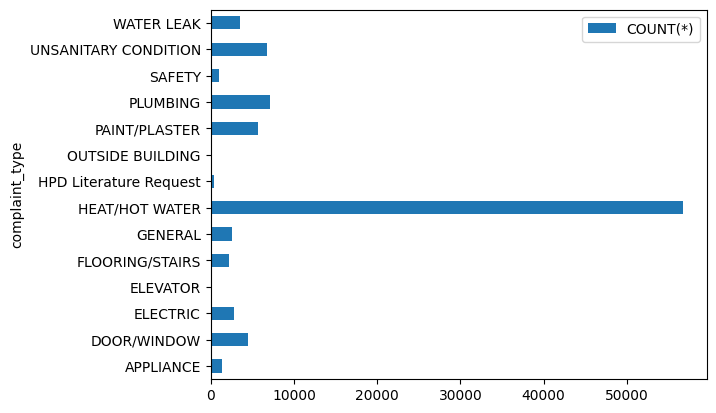

In [11]:
# Create query to get call counts by complaint_type
query = """
SELECT complaint_type, 
       COUNT(*)
  FROM hpd311calls
 GROUP BY complaint_type;
"""

# Create dataframe of call counts by issue
calls_by_issue = pd.read_sql(query, engine)

# Graph the number of calls for each housing issue
calls_by_issue.plot.barh(x="complaint_type")
plt.show()

In [ ]:
count_q = '''SELECT COUNT(*)
FROM weather;
'''

count = pd.read_sql(count_q, engine)

count.head()

# Match dengan banyaknya row dalam table weather

,COUNT(*)
0,121


In [ ]:
count_q = '''SELECT COUNT(DISTINCT(month))
FROM weather;
'''

count = pd.read_sql(count_q, engine)

count.head()

# Match with how many months are in the table data

,COUNT(DISTINCT(month))
0,4


### GROUP BY

In [ ]:
groupby_q = '''SELECT borough, COUNT(*) 
FROM hpd311calls
WHERE complaint_type = 'PLUMBING'
GROUP BY borough;  
''' # DOnt forget to use space


groupby = pd.read_sql(groupby_q, engine)

groupby.head()


# out of 10000, there are 7 thousands Plumbing complain

,borough,COUNT(*)
0,BRONX,2016
1,BROOKLYN,2702
2,MANHATTAN,1413
3,QUEENS,808
4,STATEN ISLAND,178


# LOADING MULTIBLE TABLE

### Joining Table


In [ ]:
join_q = """SELECT *
FROM hpd311calls
JOIN weather 
ON hpd311calls.created_date = weather.date;"""

join = pd.read_sql(join_q, engine)


print(join.shape)
join.head()

(91999, 21)


,unique_key,created_date,agency,complaint_type,incident_zip,incident_address,community_board,borough,station,name,...,longitude,elevation,date,month,awnd,prcp,snow,tavg,tmax,tmin
0,38070822,01/01/2018,HPD,HEAT/HOT WATER,10468,2786 JEROME AVENUE,07 BRONX,BRONX,USW00094728,"NY CITY CENTRAL PARK, NY US",...,-73.96925,42.7,01/01/2018,January,7.83,0.0,0.0,,19,7
1,38065299,01/01/2018,HPD,PLUMBING,10003,323 EAST 12 STREET,03 MANHATTAN,MANHATTAN,USW00094728,"NY CITY CENTRAL PARK, NY US",...,-73.96925,42.7,01/01/2018,January,7.83,0.0,0.0,,19,7
2,38066653,01/01/2018,HPD,HEAT/HOT WATER,10452,1235 GRAND CONCOURSE,04 BRONX,BRONX,USW00094728,"NY CITY CENTRAL PARK, NY US",...,-73.96925,42.7,01/01/2018,January,7.83,0.0,0.0,,19,7
3,38070264,01/01/2018,HPD,HEAT/HOT WATER,10032,656 WEST 171 STREET,12 MANHATTAN,MANHATTAN,USW00094728,"NY CITY CENTRAL PARK, NY US",...,-73.96925,42.7,01/01/2018,January,7.83,0.0,0.0,,19,7
4,38072466,01/01/2018,HPD,HEAT/HOT WATER,11213,1030 PARK PLACE,08 BROOKLYN,BROOKLYN,USW00094728,"NY CITY CENTRAL PARK, NY US",...,-73.96925,42.7,01/01/2018,January,7.83,0.0,0.0,,19,7


### Joining and Filtering


In [ ]:
filter_q = """SELECT *
FROM hpd311calls
JOIN weather 
ON hpd311calls.created_date = weather.date
WHERE hpd311calls.complaint_type = 'HEAT/HOT WATER';
"""

filter = pd.read_sql(filter_q, engine)


print(filter.shape)
filter.head()

(55237, 21)


,unique_key,created_date,agency,complaint_type,incident_zip,incident_address,community_board,borough,station,name,...,longitude,elevation,date,month,awnd,prcp,snow,tavg,tmax,tmin
0,38070822,01/01/2018,HPD,HEAT/HOT WATER,10468,2786 JEROME AVENUE,07 BRONX,BRONX,USW00094728,"NY CITY CENTRAL PARK, NY US",...,-73.96925,42.7,01/01/2018,January,7.83,0.0,0.0,,19,7
1,38066653,01/01/2018,HPD,HEAT/HOT WATER,10452,1235 GRAND CONCOURSE,04 BRONX,BRONX,USW00094728,"NY CITY CENTRAL PARK, NY US",...,-73.96925,42.7,01/01/2018,January,7.83,0.0,0.0,,19,7
2,38070264,01/01/2018,HPD,HEAT/HOT WATER,10032,656 WEST 171 STREET,12 MANHATTAN,MANHATTAN,USW00094728,"NY CITY CENTRAL PARK, NY US",...,-73.96925,42.7,01/01/2018,January,7.83,0.0,0.0,,19,7
3,38072466,01/01/2018,HPD,HEAT/HOT WATER,11213,1030 PARK PLACE,08 BROOKLYN,BROOKLYN,USW00094728,"NY CITY CENTRAL PARK, NY US",...,-73.96925,42.7,01/01/2018,January,7.83,0.0,0.0,,19,7
4,38076151,01/01/2018,HPD,HEAT/HOT WATER,10463,3810 BAILEY AVENUE,08 BRONX,BRONX,USW00094728,"NY CITY CENTRAL PARK, NY US",...,-73.96925,42.7,01/01/2018,January,7.83,0.0,0.0,,19,7


### Joining and Aggregating



In [ ]:
join_agg_q = """
SELECT hpd311calls.borough, 
COUNT(*)
FROM hpd311calls
GROUP BY hpd311calls.borough;
"""
# Execute the query
join_agg = pd.read_sql(join_agg_q, engine)

print(join_agg.shape)
join_agg.head()

(6, 2)


,borough,COUNT(*)
0,BRONX,29874
1,BROOKLYN,31722
2,MANHATTAN,20196
3,QUEENS,11384
4,STATEN ISLAND,1322


In [ ]:
join_agg_q2 = """
SELECT hpd311calls.borough, COUNT(*), boro_census.total_population, boro_census.housing_units
FROM hpd311calls
    JOIN boro_census 
    ON hpd311calls.borough = boro_census.borough
GROUP BY hpd311calls.borough
"""
# Execute the query
join_agg2 = pd.read_sql(join_agg_q2, engine)

print(join_agg2.shape)
join_agg2.head()

(5, 4)


,borough,COUNT(*),total_population,housing_units
0,BRONX,29874,1455846,524488
1,BROOKLYN,31722,2635121,1028383
2,MANHATTAN,20196,1653877,872645
3,QUEENS,11384,2339280,850422
4,STATEN ISLAND,1322,475948,179179
